In [1]:
%pylab inline

import seaborn; seaborn.set_style('whitegrid')

from keras.datasets import mnist
from keras.datasets import fashion_mnist

from sklearn.metrics import pairwise_distances

from umap import UMAP
from apricot import FacilityLocationSelection

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [3]:
X_fashion = fashion_mnist.load_data()[0][0]
X_fashion = X_fashion.reshape(X_fashion.shape[0], 28*28)[::10]

X_fashion_pairwise = pairwise_distances(X_fashion, metric="euclidean", squared=True)

In [4]:
X_fashion_umap = UMAP(metric="precomputed").fit_transform(X_fashion_pairwise)

/home/jmschr/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


In [5]:
model_fashion = FacilityLocationSelection(10, 'precomputed', verbose=True)
model_fashion.fit(X_fashion_pairwise.max() - X_fashion_pairwise)

100%|██████████| 10/10 [00:00<00:00, 21.19it/s]


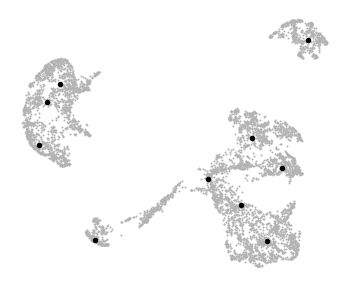

In [6]:
plt.figure(figsize=(6, 5))
plt.scatter(X_fashion_umap[:,0], X_fashion_umap[:,1], s=1, color="0.7")
plt.scatter(X_fashion_umap[model_fashion.ranking, 0], X_fashion_umap[model_fashion.ranking, 1], s=20, color="k")
plt.axis("off")
plt.show()

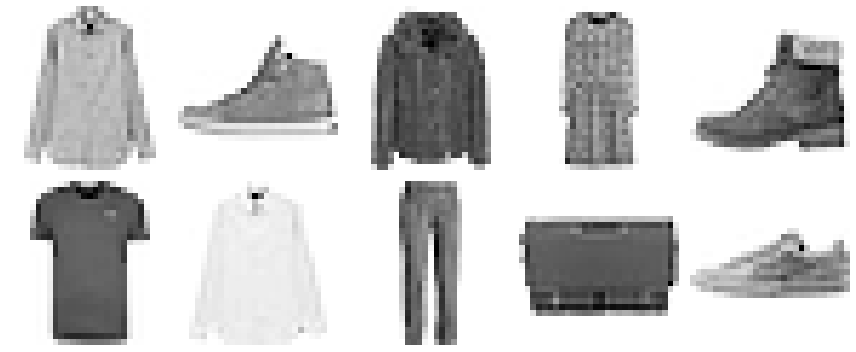

In [7]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_fashion[model_fashion.ranking[i]].reshape(28, 28), aspect='auto', cmap='Greys')
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [9]:
X_digit = mnist.load_data()[0][0][::10]
X_digit = X_digit.reshape(X_digit.shape[0], 28*28)

X_digit_pairwise = pairwise_distances(X_digit, metric="euclidean", squared=True)

X_digit_umap = UMAP(metric="precomputed").fit_transform(X_digit_pairwise)

model_digit = FacilityLocationSelection(10, 'precomputed', verbose=True)
model_digit.fit(X_digit_pairwise.max() - X_digit_pairwise)

/home/jmschr/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"
100%|██████████| 10/10 [00:00<00:00, 22.44it/s]


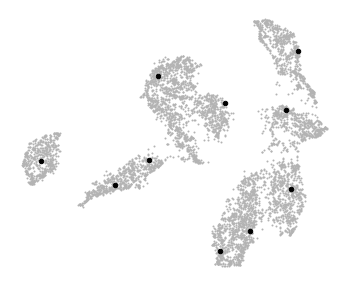

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(X_digit_umap[:,0], X_digit_umap[:,1], s=1, color="0.7")
plt.scatter(X_digit_umap[model_digit.ranking, 0], X_digit_umap[model_digit.ranking, 1], s=20, color='k')
plt.axis("off")
plt.show()

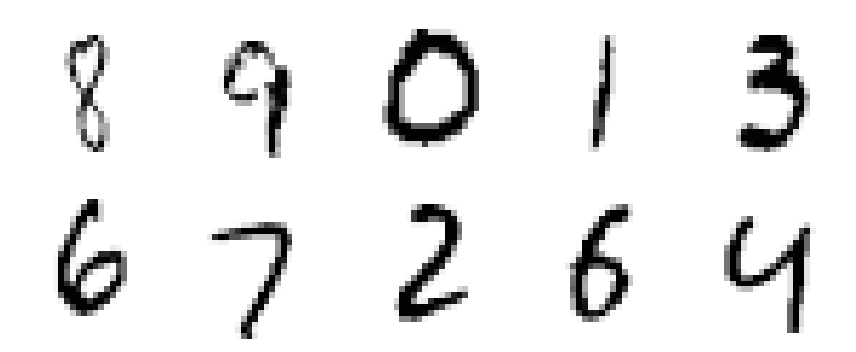

In [12]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_digit[model_digit.ranking[i]].reshape(28, 28), aspect='auto', cmap='Greys')
    plt.axis("off")
    
plt.tight_layout()
plt.show()